In [1]:
"""
Using Cartopy and AxesGrid toolkit
----------------------------------

This example demonstrates how to use cartopy `GeoAxes` with
`AxesGrid` from the `mpl_toolkits.axes_grid1`.
The script constructs an `axes_class` kwarg with Plate Carree projection
and passes it to the `AxesGrid` instance. The `AxesGrid` built-in
labelling is switched off, and instead a standard procedure
of creating grid lines is used. Then some fake data is plotted.
"""
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np
import glob

0


NameError: name 'flist' is not defined

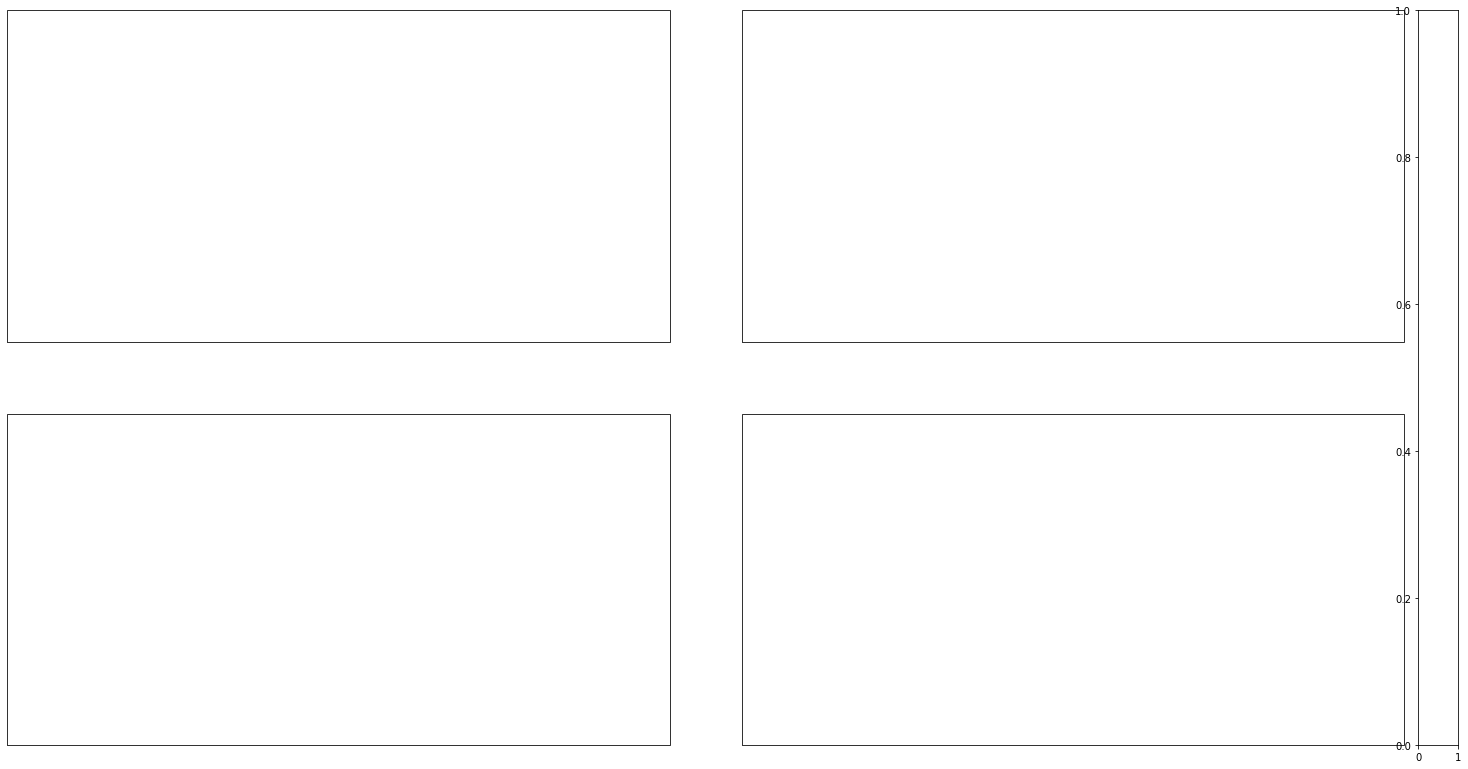

In [5]:
def climo_data_3d(run_name,var_ave,vname):
    """Returns `lons`, `lats`, `times` and fake `data`"""

    this_seas = 'DJF'
    
    dir_root = '/glade/p/cgd/amp/people/hannay/amwg/climo2/'
#    dir_root = '/glade/campaign/cgd/amp/amwg/runs/'
    run_names = ['L32','L48','L58','L58.zm2']
    
    if vname == 'ZMDT' : vscale = 86400. ; vunits = 'K/day' ; xlims = [-60,20]
    #vname = 'ZMDQ' ; vscale = 86400. ; vunits = 'K/day' ; xlims = [-60,20]
    #vname = 'T' ; vscale = 1. ; vunits = 'K' ; xlims = [280,310]
    #vname = 'DCQ' ; vscale = 86400.*1000. ; vunits = 'g/kg/day'; xlims = [-60,20]
    if vname == 'STEND_CLUBB' : vscale = 86400./1004. ; vunits = 'K/day' ; xlims = [-20,60]
    if vname == 'LHFLX' : vscale = 1. ; vunits = 'W/m^2' ; xlims = [-20,60]
    if vname == 'PRECT' : vscale = 86400.*1000. ; vunits ='mm/day'  ; xlims = [1,100]

    
#    cases = ['f.e21.FWscHIST.ne30_L32_cam6_3_019_plus_CESM2.2.001.hf',
#         'f.e21.FWscHIST.ne30_L48_cam6_3_019_plus_CESM2.2.001.hf2',
#         'f.e21.FWscHIST.ne30_L48_BL10_cam6_3_019_plus_CESM2.2.001.hf',
#         'f.e21.FWscHIST.ne30_L48_BL10_cam6_3_019_plus_CESM2.2.001_zm2.hf']

    cases = ['f.e21.FWscHIST.ne30_L48_BL10_cam6_3_041_control.hf.001',
            'f.c6_3_41.FWscHIST.ne30_L58.zm2_fix.001']

    icase = run_names.index(run_name)
    print(icase)
    
    case = cases[icase] ; run_name = run_names[icase]
    
    file_in = dir_root+case+'/yrs_1980-1989/0.9x1.25/'+case+'_'+this_seas+'_climo.nc'
#    flist = dir_root+case+'/atm/hist/'+case+'*h1*1981-*nc' 

    file_in = glob.glob(flist)
    print(file_in)
    case_nc =  xr.open_mfdataset(file_in,engine='netcdf4')
    print(vname)
    
    if vname in ['PRECT','LHFLX'] :
        var_out = vscale*case_nc[vname][:,:,:]
    else :
        var_out = vscale*case_nc[vname][:,-1,:,:] 
    
    # Time average
    if var_ave == 'mean' : var_out = var_out.mean(axis=0) 
    if var_ave == 'min' : var_out = var_out.min(axis=0)
    
    
    if var_ave == 'max' : var_out = var_out.max(axis=0)
    if var_ave == 'std' : var_out = var_out.std(axis=0)
    
    lons = case_nc.lon
    lats = case_nc.lat

#    dlon = lons[1] - lons[0]
#    lons = np.concatenate((lons, lons[-1:] + dlon))

    var_out,lons = add_cyclic_point(var_out, coord=lons)

    
    return lons, lats, var_out, vunits




def main():
    
    var_ave = 'std'
    var_name = 'PRECT'
    these_runs = ['L32','L48','L58','L58.zm2']
    
    
########
    
    
    if var_name in ['ZMDT','STEND_CLUBB']: cmap = 'RdBu_r' ;cmin = -16 ; cmax = 16. ; dlev = 2. 
    if var_name in ['LHFLX']: cmap = 'PuRd' ;cmin = 0 ; cmax = 800. ; dlev = 20.
    if var_name in ['PRECT']: cmap = 'PuBuGn' ;cmin = 0 ; cmax = 30. ; dlev = 2.
    
    plevels = np.arange(cmin,cmax+dlev,dlev,dtype=float)
    
    projection = ccrs.PlateCarree()
    axes_class = (GeoAxes,
                  dict(map_projection=projection))

   
    fig = plt.figure(figsize=(26, 20))
    
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(2, 2),
                    axes_pad=1,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    
                    label_mode='')  # note the empty label_mode

    for i, ax in enumerate(axgr):
        
        this_run = these_runs[i]

        lons, lats, data, vunits = climo_data_3d(this_run,var_ave,var_name)
        
        ax.coastlines()
        ax.set_title(this_run,fontsize=30)
        ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)
        ax.set_yticks(np.linspace(-90, 90, 5), crs=projection)
        
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        p = ax.contourf(lons, lats, data,
                        transform=projection,
                        cmap=cmap,
                        levels = plevels)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].tick_params(labelsize=20)
    axgr.cbar_axes[0].set_title(vunits,fontsize=30)

#    plt.show()
    
    plt.savefig('climo_vres_2D_'+var_name+'_'+var_ave+'.png', dpi=100, bbox_inches='tight') 

if __name__ == '__main__':
    main()